<h1>Taller 5</h1>
<h2>Grafos y algoritmos voraces</h2>

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

<h3>1. 
Algoritmo de búsqueda en profundidad (DFS) para recorrer el grafo del laberinto de pacman.</h3>

In [2]:
class Grafo(object):
    def __init__(self):
        self.relaciones = {}
    def __str__(self):
        return str(self.relaciones)
 
    def add(grafo, elemento):
        grafo.relaciones.update({elemento:[]})
        
    def one_side_join(grafo, origen, destino):
        grafo.relaciones[origen].append(destino)
        
    def join(grafo, elemento1, elemento2):
        grafo.one_side_join(elemento1, elemento2)
        grafo.one_side_join(elemento2, elemento1)
        
#implementación basada en  https://sites.google.com/site/programacioniiuno/temario/unidad-5---grafos/algoritmos-de-bsquedas

<h4>El grafo a utilizar será el siguiente:</h4>
<br><img src="https://github.com/FelipeJB/algoritmos/blob/master/Pacman.png?raw=true" width="400px"><br>
<h4>El cual se implementará de la siguiente forma:</h4>

In [3]:
G=Grafo()

G.add("A");G.add("B");G.add("C");G.add("D");G.add("E");G.add("F");G.add("G");G.add("H");
G.add("I");G.add("J");G.add("K");G.add("L");G.add("M");G.add("N");G.add("O");G.add("P");
G.add("Q");G.add("R");G.add("S");G.add("T");G.add("U");G.add("V");G.add("W");G.add("X");

G.join("A","C");G.join("A","D");G.join("A","F");
G.join("B","G");G.join("B","I");G.join("B","J");
G.join("C","D");G.join("C","K");
G.join("D","E");G.join("D","K");
G.join("E","L");G.join("E","F");
G.join("J","N");G.join("J","I");
G.join("I","N");G.join("I","H");
G.join("H","M");G.join("H","G");
G.join("O","K");G.join("O","Q");G.join("O","U");G.join("O","R");
G.join("P","N");G.join("P","S");G.join("P","T");G.join("P","V");
G.join("Q","R");G.join("Q","U");
G.join("T","S");G.join("T","V");
G.join("W","R");G.join("W","U");
G.join("X","S");G.join("X","V");G.join("X","W");

<h4>A continuación se muestra el algoritmo de búsqueda en profundidad en el grafo:</h4>

In [4]:
def dfs(g, inicio, rec):
    if inicio in rec:
        return
    print inicio
    rec.append(inicio)
    for x in g.relaciones[inicio]:
        dfs(g, x, rec)

In [5]:
dfs(G,"A",[])

A
C
D
E
L
F
K
O
Q
R
W
U
X
S
P
N
J
B
G
H
I
M
T
V


<h3>2. 
Análisis justificado del tiempo de ejecución del algoritmo DFS.</h3>

In [6]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_dfs(g, inicio, acct, rec):
    if inicio in rec:
        acct.count()
        return
    #print inicio; acct.count()
    rec.append(inicio); acct.count()
    for x in g.relaciones[inicio]:
        acct.count()
        acct_dfs(g, x, acct, rec); acct.count()
        
def dfs_exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (2,n):
        g=Grafo()
        for j in range (0,i):
            g.add(j)
            
        for j in range (0,i):
            g.join(j,rnd.randint(1,i-1))
            g.join(j,rnd.randint(1,i-1))                      
        acct.reset
        tic = time.clock()#get start time
        acct_dfs(g,i-2,acct,[])
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

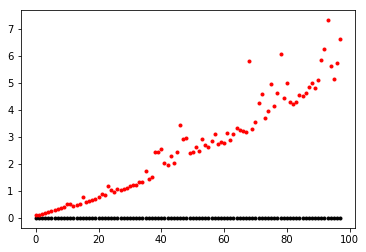

In [7]:
pl.figure (1)
x=np.arange(98)
res=(dfs_exper_analysis(100))
p=np.array(res[0])
t=np.array(res[0])*10000
pl.plot(x, p, 'k.', t, 'r.')

Si un grafo cuenta con n vertices y m aristas, el tiempo de ejecución de la búsqueda en profundidad será de $O(n*m)$, debido a que en el peor de los casos, se terminarán recorriendo cada una de las aristas y cada uno de los vértices una sola vez (suponiendo el peor de los casos, por lo tanto no habría ciclos). En este caso en particular, se le están agregando aproximadamente 2 vértices al grafo por cada arista, por lo tanto, en el peor de los casos m sería el doble de n, y en el mejor de los casos sería n (debido a que algunas relaciones pueden ser de un vértice hacia él mismo). <br>
Debido a esto podemos ver que la gráfica aumenta proporcionalmente al aumento de n y de m, con algunos casos un poco distantes, cuando m toma un valor mayor en comparación de n.

<h3>3. 
Diseño e implementación de un algoritmo que identifique ciclos en un grafo.</h3>

Para identificar si hay ciclos en un grafo se debe recorrer el mismo, verificando cuáles puntos ya se han recorrido y si se vuelve de alguna manera a llegar a ellos, para en tal caso, identificar que existe un ciclo. Se partirá del algoritmo <i><b>DFS</b></i>, debido a que este recorre todo el grafo verificando que no pase por vértices los cuales ya haya recorrido. Para este algoritmo, se especificará entonces que cuando se llegue a un vértice al cual ya se había llegado antes, no solo se retornará al anterior llamado a la función, sino que se imprimirá también que se ha detectado un ciclo.<br>
A continuación una implementación del algoritmo, junto con un caso de prueba con el grafo creado a partir del tablero de <i>Pacman</i>

In [8]:
def id_ciclos(g, inicio, rec):
    if inicio in rec:
        print "Ciclo en vértice",inicio
        return
    rec.append(inicio)
    for x in g.relaciones[inicio]:
        id_ciclos(g, x, rec)

In [9]:
id_ciclos(G,"A",[])

Ciclo en vértice A
Ciclo en vértice A
Ciclo en vértice C
Ciclo en vértice D
Ciclo en vértice E
Ciclo en vértice A
Ciclo en vértice E
Ciclo en vértice C
Ciclo en vértice D
Ciclo en vértice K
Ciclo en vértice O
Ciclo en vértice O
Ciclo en vértice Q
Ciclo en vértice R
Ciclo en vértice O
Ciclo en vértice Q
Ciclo en vértice W
Ciclo en vértice B
Ciclo en vértice B
Ciclo en vértice J
Ciclo en vértice N
Ciclo en vértice H
Ciclo en vértice H
Ciclo en vértice G
Ciclo en vértice I
Ciclo en vértice J
Ciclo en vértice N
Ciclo en vértice I
Ciclo en vértice I
Ciclo en vértice P
Ciclo en vértice S
Ciclo en vértice P
Ciclo en vértice S
Ciclo en vértice P
Ciclo en vértice T
Ciclo en vértice X
Ciclo en vértice V
Ciclo en vértice T
Ciclo en vértice X
Ciclo en vértice V
Ciclo en vértice W
Ciclo en vértice U
Ciclo en vértice U
Ciclo en vértice R
Ciclo en vértice K
Ciclo en vértice D
Ciclo en vértice F


<h3>4. 
Diseño e implementación de un algoritmo que verifique si un grafo es bipartito o no.</h3>

Para identificar si un grafo es bipartito o no nos podemos basar en 4 condiciones particulares de los grafos bipartitos:<br><br>
<b><i>Si un grafo tiene número impar de vértices y no tiene ciclos, el grafo es bipartito</i></b><br>
<b><i>Si un grafo tiene número impar de vértices y tiene ciclos, el grafo no es bipartito</i></b><br>
<b><i>Si un grafo tiene número par de vértices y no tiene ciclos, el grafo no es bipartito</i></b><br>
<b><i>Si un grafo tiene número par de vértices y tiene ciclos, el grafo es bipartito</i></b><br><br>
A partir de estas condiciones, se puede utilizar la función para determinar si un grafo cuenta o no con ciclos, con algunas modificaciones para que guarde en un valor booleano si el grafo tiene ciclos o no. Posteriormente, se evaluará si el grafo tiene una cantidad par o impar de vértices, para así concluir si el grafo es o no bipartito.
Para probar esta implementación se utilizará el grafo de <i>Pacman</i> instanciado anteriormente.

In [10]:
def ciclos(g, inicio, c, rec):
    if inicio in rec:
        c[0]=True
        return
    rec.append(inicio)
    for x in g.relaciones[inicio]:
        ciclos(g, x, c,  rec)
        
def bipartito(g, inicio):
    c=[]
    c.append(False)
    ciclos(g, inicio, c, [])
    if c[0]==True:
        if len(g.relaciones)%2==0:
            return True    
        else:
            return False    
    else:
        if len(g.relaciones)%2==0:
            return False    
        else:            
            return True

In [11]:
if bipartito(G,"A"):
    print "El grafo es bipartito"
else:
    print "El grafo no es bipartito"

El grafo es bipartito


<h3>5. 
Modificación del algoritmo de dijkstra para solucionar el problema de la ruta más corta en un grafo sin pesos, i.e. partiendo de un vertice inicial encontrar la ruta y su distancia a todos los demás vertices haciendo la menor cantidad de saltos.</h3>

In [12]:
def min_path(grafo, origen, destino):
    etiquetas = {origen:(0,None)}
    dijkstra(grafo, destino, etiquetas, [])
    return build(etiquetas, origen, destino)

def build(etiquetas, origen, destino):    
    if origen == destino:
        return [origen]
    return build(etiquetas, origen, (etiquetas[destino])[1]) + [destino]
    
    
def dijkstra(grafo, destino, etiquetas, procesados):
    etiquetadosSinProcesar = filter(lambda (nodo,_):not nodo in procesados, etiquetas.iteritems())    
    nodoActual = min(etiquetadosSinProcesar, key=lambda (_, (acum, __)): acum)[0]
    if nodoActual == destino: 
        return
    procesados.append(nodoActual)
    aristasDeVecinosNoProcesados = filter(lambda x: not x in procesados, grafo.relaciones[nodoActual])
    for vecino in aristasDeVecinosNoProcesados:
        etiquetaNodoAnterior = etiquetas[nodoActual]
        etiquetaPropuesta = 1 + etiquetaNodoAnterior[0], nodoActual
        if (not(etiquetas.has_key(vecino)) or  etiquetaPropuesta[0] < (etiquetas[vecino])[0] ):
            etiquetas.update({vecino:etiquetaPropuesta})        
    dijkstra(grafo, destino, etiquetas, procesados)


In [13]:
print min_path(G,"A","X")

['A', 'C', 'K', 'O', 'R', 'W', 'X']
